# St. Louis Cardinals Vs. Chicago Cubs
Historically there has been a great baseball rivaly between the Cardinals and the Cubs.  Python and Sqlite3 will be used to evaluate the history of the ball teams to determine which team is the best.  

In [8]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In the next cell I create a baseball database and read in the csv file that has the annual team data from 1871-2018.

In [3]:
con = sqlite3.connect('mlbbaseball.db')
mlb_df = pd.read_csv('../../../Desktop/Teams.csv', index_col=None, na_values=['NA'])

Next I add the team_table to my baseball database.

In [4]:
mlb_df.to_sql("team_table", con, if_exists = "replace")

When it comes to baseball the best team is always determined by who wins the **World Series**.  Since 1903 the top team from the American League and the National League have fought to be World Champions over a series of seven (used to be nine) games.  The most obvious way to determine which team is best is to figure out how many times each team has been the top in their league since 1903.       

In [5]:
ws_df = pd.read_csv('../../../Desktop/SeriesPost.csv', index_col=None, na_values=['NA'])
ws_df.to_sql("WorldSeries_table", con, if_exists = "replace")

In [6]:
sln_ws_df = pd.read_sql_query("SELECT count(yearID) AS WS_Wins, teamIDwinner AS team FROM WorldSeries_table WHERE round='WS' AND (teamIDwinner = 'SLN' OR teamIDwinner = 'SL4') ", con)
chn_ws_df = pd.read_sql_query("SELECT count(yearID) AS WS_Wins, teamIDwinner AS team FROM WorldSeries_table WHERE round='WS' AND teamIDwinner = 'CHN' ", con)
all_ws_df = pd.concat([sln_ws_df, chn_ws_df])
all_ws_df

,WS_Wins,team
0,12,SLN
0,4,CHN


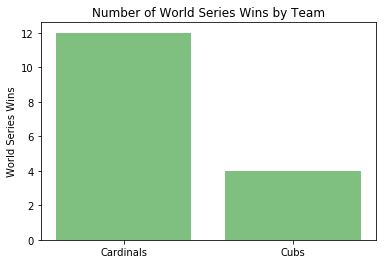

In [23]:
teams = ('Cardinals', 'Cubs')
y_pos = np.arange(len(teams))
ws_wins = [12, 4]

plt.bar(y_pos, ws_wins, align='center', alpha=0.5, color='green')
plt.xticks(y_pos, teams)
plt.ylabel('World Series Wins')
plt.title('Number of World Series Wins by Team')

plt.show()


This really is not a fair judge of the teams.  Any baseball fan knows about **The Curse of the Billy Goat**, a 71 year curse that prohibited the Cubs from winning a World Series.  A better way to judge the two teams to see who has the best record of wins over loss.  

In [16]:
slnwinlos_df = pd.read_sql_query("SELECT teamID AS team, SUM(W) AS total_wins, SUM(L) AS total_loss FROM team_table WHERE (teamID = 'SLN' OR teamID = 'SL4') ORDER BY teamID", con)
chnwinlos_df = pd.read_sql_query("SELECT teamID AS team, SUM(W) AS total_wins, SUM(L) AS total_loss FROM team_table WHERE teamID = 'CHN' ORDER BY teamID", con)
all_winlos_df = pd.concat([slnwinlos_df, chnwinlos_df])

all_winlos_df

,team,total_wins,total_loss
0,SLN,10827,9992
0,CHN,10898,10326


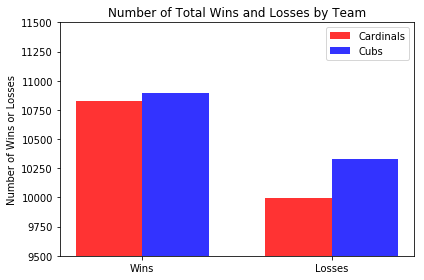

In [37]:
# final_df = all_ws_df.set_index('team').join(all_winlos_df.set_index('team'))
# final_df

n_groups = 2
sln_winlos = (10827, 9992)
chn_winlos = (10898, 10326)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, sln_winlos, bar_width, alpha=opacity, color='red', label='Cardinals')
rects1 = plt.bar(index + bar_width, chn_winlos, bar_width, alpha=opacity, color='blue', label='Cubs')

plt.ylabel('Number of Wins or Losses')
plt.title('Number of Total Wins and Losses by Team')
plt.xticks(index + .5 * bar_width, ('Wins', 'Losses'))
plt.ylim(9500, 11500)
plt.legend()

plt.tight_layout()
plt.show()

The Cubs team started playing ball in 1876 and the Cardinals team was started in 1882.  Given this 6 year difference the team wins and losses before 1882 need to be excluded from this query.  The St Louis team that started playing ball in 1882 was originally called the Brown Stockings.  The team information from the Brown Stockings will be included in the query.  In 1900 the team was renamed the Cardinals.  Nothing in the team was changed other than their name.  This is why the Brown Stocking information will included in the query. 

In [35]:
slnwinlos_df = pd.read_sql_query("SELECT teamID AS team, SUM(W) AS total_wins, SUM(L) AS total_loss FROM team_table WHERE yearID > 1881 AND (teamID = 'SLN' OR teamID = 'SL4') ORDER BY teamID", con)
chnwinlos_df = pd.read_sql_query("SELECT teamID AS team, SUM(W) AS total_wins, SUM(L) AS total_loss FROM team_table WHERE yearID > 1881 AND teamID = 'CHN' ORDER BY teamID", con)
all_winlos_df = pd.concat([slnwinlos_df, chnwinlos_df])

all_winlos_df

,team,total_wins,total_loss
0,SLN,10827,9992
0,CHN,10621,10171


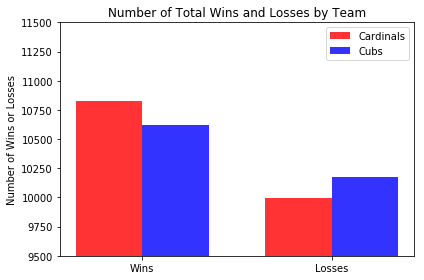

In [38]:
n_groups = 2
sln_winlos = (10827, 9992)
chn_winlos = (10621, 10171)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, sln_winlos, bar_width, alpha=opacity, color='red', label='Cardinals')
rects1 = plt.bar(index + bar_width, chn_winlos, bar_width, alpha=opacity, color='blue', label='Cubs')

plt.ylabel('Number of Wins or Losses')
plt.title('Number of Total Wins and Losses by Team')
plt.xticks(index + .5 * bar_width, ('Wins', 'Losses'))
plt.ylim(9500, 11500)
plt.legend()

plt.tight_layout()
plt.show()

After modifying the data collection to begin in 1882 the results change.  

In the graph above The Cardinals appear to be the superior team in that they have more winns and less losses than the Cubs.  Raw data is never the enire story.  Comparing the average wins and losses for each team tells a different story.  

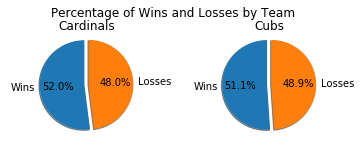

<Figure size 2160x1440 with 0 Axes>

In [157]:
sln_total_games = slnwinlos_df['total_wins'] + slnwinlos_df['total_loss']
sln_percent_win = slnwinlos_df['total_wins'] / sln_total_games
sln_percent_loss = slnwinlos_df['total_loss']/ sln_total_games
percent_winloss = [sln_percent_win, sln_percent_loss, chn_percent_win, chn_percent_loss]
percent_winloss_df = pd.DataFrame(columns = percent_winloss)

chn_total_games = chnwinlos_df['total_wins'] + chnwinlos_df['total_loss']
chn_percent_win = chnwinlos_df['total_wins'] / chn_total_games
chn_percent_loss = chnwinlos_df['total_loss']/ chn_total_games

labels = 'Wins', 'Losses'
sln_sizes = [sln_percent_win, sln_percent_loss]
chn_sizes = [chn_percent_win, chn_percent_loss]
explode = (0.1, 0)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

fig.suptitle('Percentage of Wins and Losses by Team')

plt.figure(figsize = (30,20))
plt.subplots_adjust(hspace = 0.9, wspace=0.75)

ax1.pie(sln_sizes, explode=explode, labels = labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.set_title("Cardinals")
ax1.axis('equal') 

ax2.pie(chn_sizes, explode=explode, labels = labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax2.set_title("Cubs")
ax2.axis('equal') 

plt.show()

In [92]:
sln_pitches_df = pd.read_sql_query("SELECT teamID AS team, avg(ERA), SUM(BBA) AS total_walks, SUM(SOA) AS total_strikeout FROM team_table WHERE yearID > 1881 AND (teamID = 'SLN' OR teamID = 'SL4')", con)
chn_pitches_df = pd.read_sql_query("SELECT teamID AS team, avg(ERA), SUM(BBA) AS total_walks, SUM(SOA) AS total_strikeout FROM team_table WHERE yearID > 1881 AND teamID = 'CHN' ", con)
all_pitches_df = pd.concat([sln_pitches_df, chn_pitches_df])
all_pitches_df

,team,avg(ERA),total_walks,total_strikeout
0,SLN,3.672555,63614,95800
0,CHN,3.690730,65398,101803


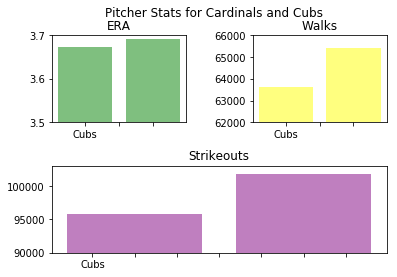

In [180]:
era = (3.672555, 3.690730)
total_walks = (63614, 65398)
total_strikeouts = (95800, 101803)
sln_total_pitches = total_walks[0] + total_strikeouts[0]
chn_total_pitches = total_walks[1] + total_strikeouts[1]

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

fig.suptitle('Pitcher Stats for Cardinals and Cubs')

ax1.bar(y_pos, era, align='center', alpha=0.5, color='green')
ax1.set_ylim(3.5, 3.7)
ax1.set_xticklabels(teams)
ax1.set_title('ERA')

ax2.bar(y_pos, total_walks, align='center', alpha=0.5, color='yellow')
ax2.set_ylim(62000, 66000)
ax2.set_xticklabels(teams)
ax2.set_title('Walks')

ax3.bar(y_pos, total_strikeouts, align='center', alpha=0.5, color='purple')
ax3.set_ylim(90000, 103000)
ax3.set_xticklabels(teams)
ax3.set_title('Strikeouts')

plt.show()

When looking at the raw data the Cardinals have a better ERA and fewer walks than the Cubs, 
however the Cubs have more strikeouts than the Cardinals.  When we calculate a with walks and strikeouts into a percentage
the results change.

In [181]:
def percentage(number, total):
    return number/total



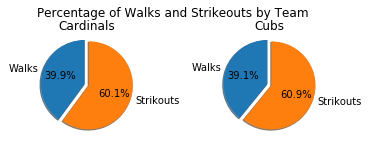

<Figure size 2160x1440 with 0 Axes>

In [191]:
sln_walk_percent = percentage(total_walks[0], sln_total_pitches)
sln_strikeout_percent = percentage(total_strikeouts[0], sln_total_pitches)

chn_walk_percent = percentage(total_walks[1], chn_total_pitches)
chn_strikeout_percent = percentage(total_strikeouts[1], chn_total_pitches)

pitch_label = 'Walks', 'Strikouts'

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

fig.suptitle('Percentage of Walks and Strikeouts by Team')

plt.figure(figsize = (30,20))
plt.subplots_adjust(hspace = 0.9, wspace=0.75)

ax1.pie([sln_walk_percent, sln_strikeout_percent], explode=explode, labels = pitch_label, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.set_title("Cardinals")
ax1.axis('equal') 

ax2.pie([chn_walk_percent, chn_strikeout_percent], explode=explode, labels = pitch_label, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax2.set_title("Cubs")
ax2.axis('equal') 

plt.show()

In the pie graphs above it is easy to see that they Cardinals and Cubs have pitched, on average, the same amount of walks and strikeouts in the history of their ball clubs. 

Pitchers only stop the other team from scoring runs.  If your batters aren't getting hits your ball club 
will be no good regardless of the strength of your pitchers.

In [194]:
sln_hits_df = pd.read_sql_query("SELECT teamID AS team, SUM(AB) AS at_bat, SUM(H) AS hits, SUM('2B') AS double, SUM('3B') AS triple, SUM(HR) AS home_runs FROM team_table WHERE yearID > 1881 AND (teamID = 'SLN' OR teamID = 'SL4') ORDER BY yearID", con)
chn_hits_df = pd.read_sql_query("SELECT teamID AS team, SUM(AB) AS at_bat, SUM(H) AS hits, SUM('2B') AS double, SUM('3B') AS triple, SUM(HR) AS home_runs FROM team_table WHERE yearID > 1881 AND teamID = 'CHN' ORDER BY yearID", con)
all_hits_df = pd.concat([sln_hits_df, chn_hits_df])
all_hits_df

,team,at_bat,hits,double,triple,home_runs
0,SLN,719570,191701,274.0,411.0,12089
0,CHN,715797,187556,274.0,411.0,14090


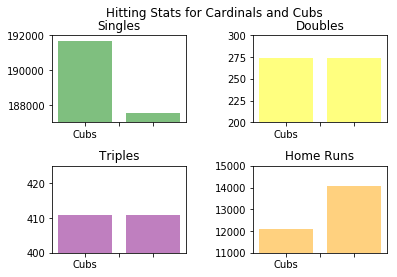

In [199]:
at_bats = (719570, 715797)
total_hits = (191701, 187556)
total_double = (274, 274)
total_triple = (411, 411)
total_homerun = (12089, 14090)
total_outs = (at_bats[0]-total_hits[0]-total_double[0]-total_triple[0]-total_homerun[0], at_bats[1]-total_hits[1]-total_double[1]-total_triple[1]-total_homerun[1])

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

fig.suptitle('Hitting Stats for Cardinals and Cubs')

ax1.bar(y_pos, total_hits, align='center', alpha=0.5, color='green')
ax1.set_ylim(187000, 192000)
ax1.set_xticklabels(teams)
ax1.set_title('Singles')

ax2.bar(y_pos, total_double, align='center', alpha=0.5, color='yellow')
ax2.set_ylim(200, 300)
ax2.set_xticklabels(teams)
ax2.set_title('Doubles')

ax3.bar(y_pos, total_triple, align='center', alpha=0.5, color='purple')
ax3.set_ylim(400, 425)
ax3.set_xticklabels(teams)
ax3.set_title('Triples')

ax4.bar(y_pos, total_homerun, align='center', alpha=0.5, color='orange')
ax4.set_ylim(11000, 15000)
ax4.set_xticklabels(teams)
ax4.set_title('Home Runs')

plt.show()

The Cardinals have more singles and less home runs than the Cubs.  Both teams have the same number of doubles and triples.  It is unclear if this is a mistake in the data or if it is mean coinsidence.

In [207]:
sln_single_percent = percentage(total_hits[0], at_bats[0])
sln_double_percent = percentage(total_double[0], at_bats[0])
sln_triple_percent = percentage(total_triple[0], at_bats[0])
sln_homerun_percent = percentage(total_homerun[0], at_bats[0])

chn_single_percent = percentage(total_hits[1], at_bats[1])
chn_double_percent = percentage(total_double[1], at_bats[1])
chn_triple_percent = percentage(total_triple[1], at_bats[1])
chn_homerun_percent = percentage(total_homerun[1], at_bats[1])

hits_data = {'singles': [sln_single_percent, chn_single_percent], 'doubles': [sln_double_percent, chn_double_percent], 'triples': [sln_triple_percent, chn_triple_percent], 'home_runs': [sln_homerun_percent, chn_homerun_percent]}
percent_hits_df = pd.DataFrame(data = hits_data)
percent_hits_df

,singles,doubles,triples,home_runs
0,0.266410,0.000381,0.000571,0.016800
1,0.262024,0.000383,0.000574,0.019684


In [73]:
batting_df = pd.read_csv('../../../Desktop/Batting.csv', index_col=None, na_values=['NA'])
batting_df.to_sql("Batting_table", con, if_exists = "replace")

people_df = pd.read_csv('../../../Desktop/People.csv', index_col=None, na_values=['NA'])
people_df.to_sql("people_table", con, if_exists = "replace")

In [93]:
hr_batting_df = pd.read_sql_query("SELECT teamID AS team, playerID, HR FROM batting_table WHERE yearID > 1882 AND (teamID = 'SLN' OR teamID = 'SL4' OR teamID = 'CHN') ORDER BY HR DESC", con)
hr_batting_df.head()

batting_name_df = pd.read_sql_query("SELECT nameLast, nameFirst, HR, teamID FROM batting_table INNER JOIN people_table ON batting_table.playerID = people_table.playerID WHERE yearID > 1882 AND (teamID = 'SLN' OR teamID = 'SL4' OR teamID = 'CHN') AND HR > 40 ORDER BY teamID DESC", con)
batting_name_df

,nameLast,nameFirst,HR,teamID
0,Hornsby,Rogers,42,SLN
1,Mize,Johnny,43,SLN
2,McGwire,Mark,70,SLN
3,McGwire,Mark,65,SLN
4,Edmonds,Jim,42,SLN
5,Pujols,Albert,43,SLN
6,Edmonds,Jim,42,SLN
7,Pujols,Albert,46,SLN
8,Pujols,Albert,41,SLN
9,Pujols,Albert,49,SLN
